# Introduction

### Notes

1. Might want to increase the MAX_STEP and equation length -- muzero might be able to exploit longer things. 
2. Check how large the depth search is
3. Action masking, illegal action.
4. Debug the env... there is some shenanigans going on... aren't illegal equations supposedly impossible?
5. Then curriculum learning


### x+b = 0

Mean Rewards: [-0.026250000000000124, 0.1499999999999999, -0.11000000000000008, 0.4262499999999999, 0.5762499999999999, -0.12625000000000008, 0.02874999999999993, 0.2849999999999999, 0.44375, 0.57375, 0.3999999999999999, 0.4237499999999999, -0.013750000000000082, 0.44875, 0.46624999999999994, 0.45749999999999996, -0.10000000000000009, 0.3112499999999999, 0.012499999999999928, 0.18999999999999995, 0.44499999999999995, 0.19624999999999995, 0.86625, 0.43999999999999995, 0.29999999999999993, 0.59, -0.06625000000000004, 0.46249999999999997, 0.5599999999999999]
Min Rewards: [-0.39000000000000024, -0.19000000000000017, -1.0, -0.2200000000000002, -0.22000000000000008, -0.2200000000000002, -0.2600000000000001, -0.18000000000000016, -0.14000000000000012, -0.22000000000000008, -0.30000000000000016, -0.2200000000000002, -0.2400000000000002, -0.10000000000000009, -0.09000000000000008, -0.09000000000000008, -0.20000000000000018, -0.10000000000000009, -0.20000000000000007, -0.09000000000000008, -0.10

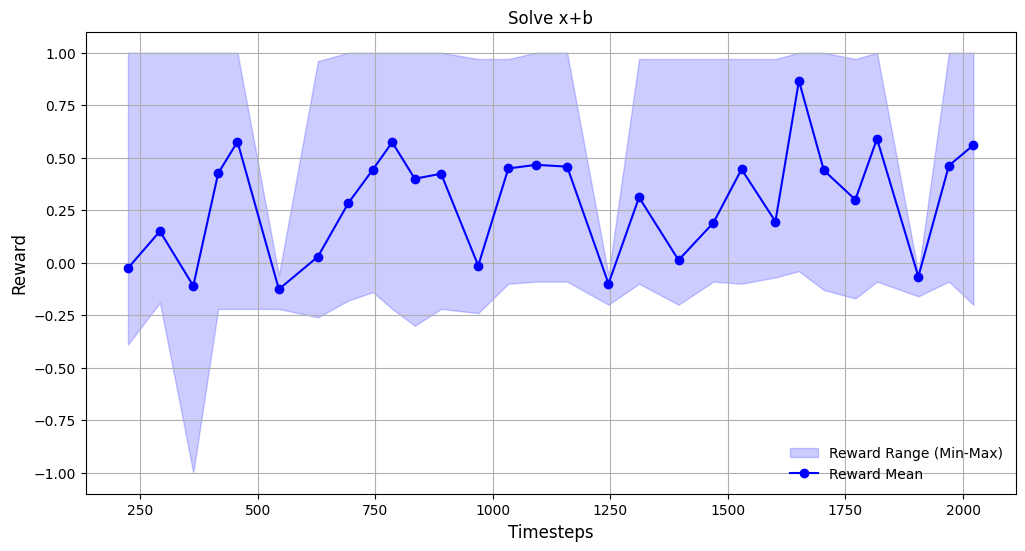

First max reward > 100 at timestep: 224 with reward: 1.0


In [33]:
import os
import matplotlib.pyplot as plt

# Path to the experiment logs
data_dir = "/Users/Kev/Documents/research/LightZero/data_muzero/x+b"
collector_log_dir = os.path.join(data_dir, "log", "collector")

# Initialize storage for reward statistics and episode counts
mean_rewards = []
min_rewards = []
max_rewards = []
timesteps = []  # Will store the total_envstep_count

# Read the `collector_logger.txt` file
collector_log_file = os.path.join(collector_log_dir, "collector_logger.txt")
if os.path.isfile(collector_log_file):
    with open(collector_log_file, "r") as f:
        for line in f:
            if "reward_mean" in line:
                mean_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_min" in line:
                min_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_max" in line:
                max_rewards.append(float(line.split(":")[-1].strip()))
            elif "total_envstep_count" in line:  # Extract total_envstep_count
                timesteps.append(int(line.split(":")[-1].strip()))
else:
    print(f"No collector log file found at {collector_log_file}")
    exit()

# Debug the parsed data
print("Mean Rewards:", mean_rewards)
print("Min Rewards:", min_rewards)
print("Max Rewards:", max_rewards)
print("Timesteps:", timesteps)

# Ensure reward_errors have non-negative values
reward_errors = [
    [max(0, mean - min_val) for mean, min_val in zip(mean_rewards, min_rewards)],  # Lower error
    [max(0, max_val - mean) for max_val, mean in zip(max_rewards, mean_rewards)]   # Upper error
]

# Plot the learning curve with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(
    timesteps, mean_rewards,  fmt="-o", capsize=5, label="Reward Mean", color="blue"
)
plt.fill_between(
    timesteps, min_rewards, max_rewards, color="blue", alpha=0.2, label="Reward Range (Min-Max)"
)
plt.xlabel("Timesteps")  # Change from Episodes to Timesteps
plt.ylabel("Reward")
plt.title("Solve x+b")
plt.legend()
plt.grid(True)
plt.show()


# Ensure the lists are not empty
if max_rewards and timesteps:
    for i, reward in enumerate(max_rewards):
        if reward >= 1:
            print(f"First max reward > 100 at timestep: {timesteps[i]} with reward: {reward}")
            break
else:
    print("The lists are empty. Please check your data.")


Mean Rewards: [0.022678571428571326, 0.16218749999999993, 0.1153124999999999, 0.08281249999999989, 0.0009374999999999106, 0.2359374999999999, 0.1318749999999999, 0.26093749999999993, 0.26781249999999995, 0.18781249999999994, 0.028749999999999915, -0.040937500000000085, -0.0006250000000000699, 0.17031249999999992, 0.271875, 0.20374999999999993, 0.24968749999999995, 0.25156249999999997, 0.3553125, 0.20374999999999993, 0.23187499999999994, 0.20781249999999996, 0.02999999999999997, 0.195625]
Min Rewards: [-1.03, -0.30000000000000027, -0.31000000000000016, -0.3500000000000002, -1.01, -0.2200000000000002, -1.03, -0.28000000000000025, -0.2400000000000002, -0.33000000000000007, -1.03, -1.05, -1.06, -1.04, -0.15000000000000013, -0.2400000000000002, -0.08000000000000007, -0.1100000000000001, -1.03, -0.30000000000000027, -0.45000000000000007, -0.18000000000000005, -0.1200000000000001, -0.08000000000000007]
Max Rewards: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

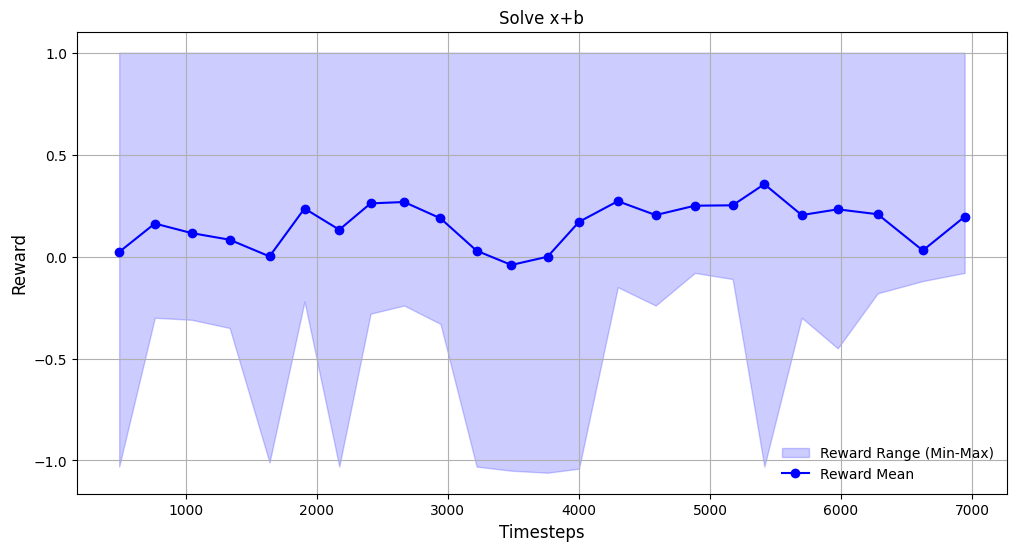

First max reward > 100 at timestep: 493 with reward: 1.0


In [51]:
import os
import matplotlib.pyplot as plt

# Path to the experiment logs
data_dir = "/Users/Kev/Documents/research/LightZero/data_muzero/x+b"
collector_log_dir = os.path.join(data_dir, "log", "collector")

# Initialize storage for reward statistics and episode counts
mean_rewards = []
min_rewards = []
max_rewards = []
timesteps = []  # Will store the total_envstep_count

# Read the `collector_logger.txt` file
collector_log_file = os.path.join(collector_log_dir, "collector_logger.txt")
if os.path.isfile(collector_log_file):
    with open(collector_log_file, "r") as f:
        for line in f:
            if "reward_mean" in line:
                mean_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_min" in line:
                min_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_max" in line:
                max_rewards.append(float(line.split(":")[-1].strip()))
            elif "total_envstep_count" in line:  # Extract total_envstep_count
                timesteps.append(int(line.split(":")[-1].strip()))
else:
    print(f"No collector log file found at {collector_log_file}")
    exit()

# Debug the parsed data
print("Mean Rewards:", mean_rewards)
print("Min Rewards:", min_rewards)
print("Max Rewards:", max_rewards)
print("Timesteps:", timesteps)

# Ensure reward_errors have non-negative values
reward_errors = [
    [max(0, mean - min_val) for mean, min_val in zip(mean_rewards, min_rewards)],  # Lower error
    [max(0, max_val - mean) for max_val, mean in zip(max_rewards, mean_rewards)]   # Upper error
]

# Plot the learning curve with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(
    timesteps, mean_rewards,  fmt="-o", capsize=5, label="Reward Mean", color="blue"
)
plt.fill_between(
    timesteps, min_rewards, max_rewards, color="blue", alpha=0.2, label="Reward Range (Min-Max)"
)
plt.xlabel("Timesteps")  # Change from Episodes to Timesteps
plt.ylabel("Reward")
plt.title("Solve x+b")
plt.legend()
plt.grid(True)
plt.show()


# Ensure the lists are not empty
if max_rewards and timesteps:
    for i, reward in enumerate(max_rewards):
        if reward >= 1:
            print(f"First max reward > 100 at timestep: {timesteps[i]} with reward: {reward}")
            break
else:
    print("The lists are empty. Please check your data.")


Mean Rewards: []
Min Rewards: []
Max Rewards: []
Timesteps: []


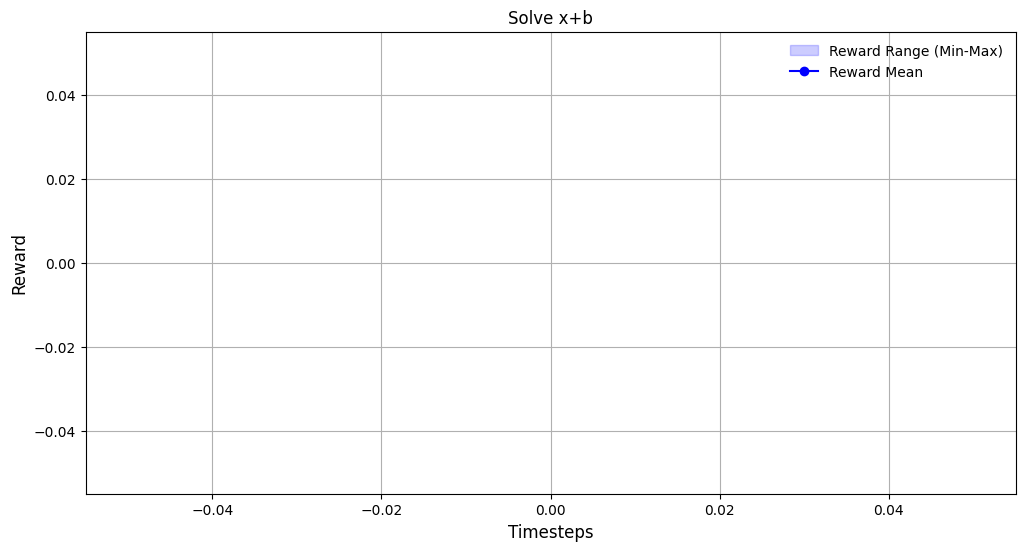

The lists are empty. Please check your data.


In [56]:
import os
import matplotlib.pyplot as plt

# Path to the experiment logs
data_dir = "/Users/Kev/Documents/research/LightZero/data_muzero/x+b"
collector_log_dir = os.path.join(data_dir, "log", "collector")

# Initialize storage for reward statistics and episode counts
mean_rewards = []
min_rewards = []
max_rewards = []
timesteps = []  # Will store the total_envstep_count

# Read the `collector_logger.txt` file
collector_log_file = os.path.join(collector_log_dir, "collector_logger.txt")
if os.path.isfile(collector_log_file):
    with open(collector_log_file, "r") as f:
        for line in f:
            if "reward_mean" in line:
                mean_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_min" in line:
                min_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_max" in line:
                max_rewards.append(float(line.split(":")[-1].strip()))
            elif "total_envstep_count" in line:  # Extract total_envstep_count
                timesteps.append(int(line.split(":")[-1].strip()))
else:
    print(f"No collector log file found at {collector_log_file}")
    exit()

# Debug the parsed data
print("Mean Rewards:", mean_rewards)
print("Min Rewards:", min_rewards)
print("Max Rewards:", max_rewards)
print("Timesteps:", timesteps)

# Ensure reward_errors have non-negative values
reward_errors = [
    [max(0, mean - min_val) for mean, min_val in zip(mean_rewards, min_rewards)],  # Lower error
    [max(0, max_val - mean) for max_val, mean in zip(max_rewards, mean_rewards)]   # Upper error
]

# Plot the learning curve with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(
    timesteps, mean_rewards,  fmt="-o", capsize=5, label="Reward Mean", color="blue"
)
plt.fill_between(
    timesteps, min_rewards, max_rewards, color="blue", alpha=0.2, label="Reward Range (Min-Max)"
)
plt.xlabel("Timesteps")  # Change from Episodes to Timesteps
plt.ylabel("Reward")
plt.title("Solve x+b")
plt.legend()
plt.grid(True)
plt.show()


# Ensure the lists are not empty
if max_rewards and timesteps:
    for i, reward in enumerate(max_rewards):
        if reward >= 1:
            print(f"First max reward > 100 at timestep: {timesteps[i]} with reward: {reward}")
            break
else:
    print("The lists are empty. Please check your data.")